Name: Prasanna Kumar Vemula
Midterm
Predictive Modeling and Machine Learning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
data = pd.read_csv("healthcare_dataset.csv")
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


The collection includes patient medical records with a range of billing, medical, and demographic data. The patient's name, age, gender, blood type, medical condition, admission and discharge dates are the essential details. The dataset also includes information about the treating physician, the hospital, the insurance company that paid for the services, and the total amount of bills. The room number, the reason for admittance (urgent, emergency, or elective), and the prescription medication are all included in each record. Test findings that fall into categories like normal, abnormal, or inconclusive provide further information about the patient's health. Analyzing trends in medical treatment, patient demographics, and healthcare expenses can be facilitated by this extensive data set. 

In [5]:
import random
random_float = random.random()
print(random_float)


0.15686886586098925


The random number is 0.12354330291907012

In [7]:
data['Blood Type'].replace(['A-', 'A+', 'AB-', 'AB+', 'B-', 'B+', 'O-', 'O+'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

print(data['Blood Type'])


0        4
1        1
2        0
3        7
4        3
        ..
55495    7
55496    2
55497    5
55498    6
55499    7
Name: Blood Type, Length: 55500, dtype: int64


C:\Users\pabbi\AppData\Local\Temp\ipykernel_22644\1883238669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Blood Type'].replace(['A-', 'A+', 'AB-', 'AB+', 'B-', 'B+', 'O-', 'O+'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
C:\Users\pabbi\AppData\Local\Temp\ipykernel_22644\1883238669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

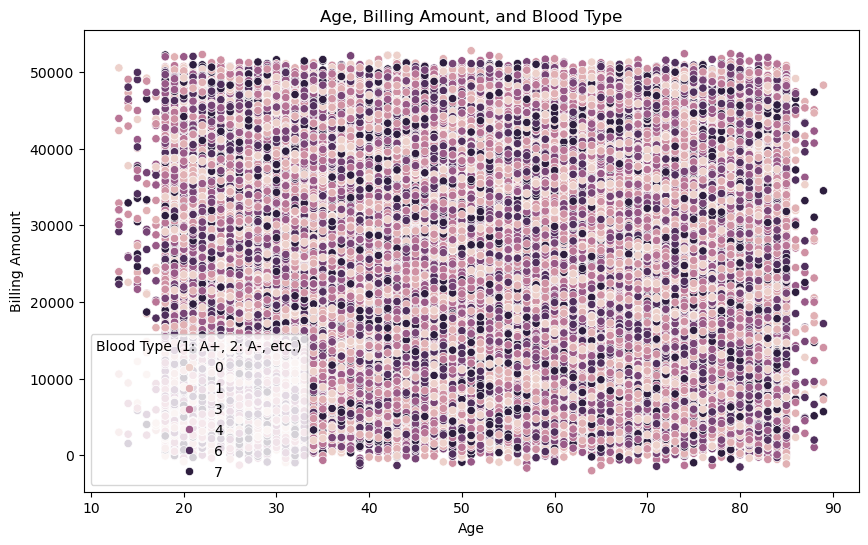

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Billing Amount', hue='Blood Type', data=data)
plt.title('Age, Billing Amount, and Blood Type')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.legend(title='Blood Type (1: A+, 2: A-, etc.)')
plt.show()

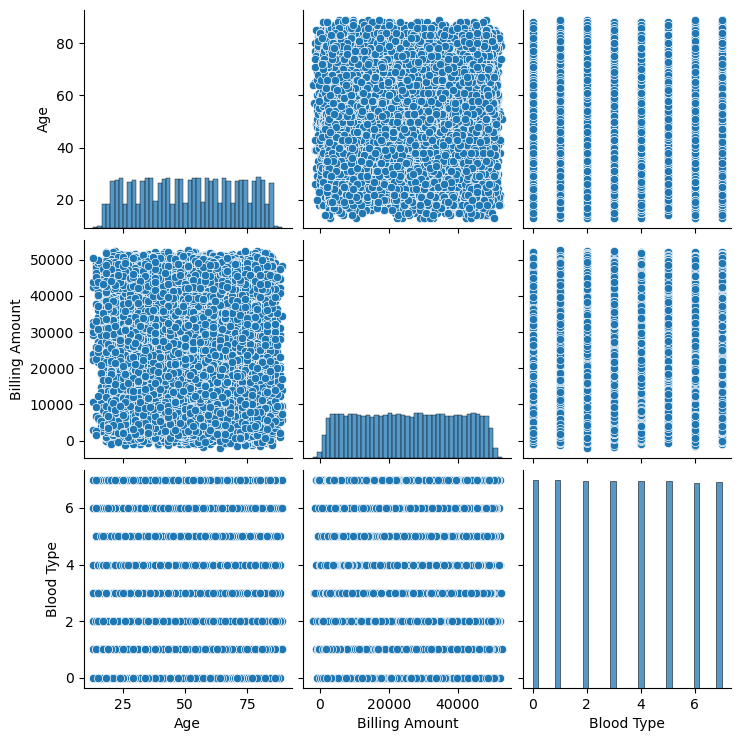

In [9]:
import seaborn as sns
sns.pairplot(data[['Age', 'Billing Amount', 'Blood Type']])
plt.show()

In [10]:
X = data[['Age', 'Billing Amount']]
y = data['Blood Type']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)


In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[341 262 224 304 256 255 234 231]
 [249 351 245 256 244 281 224 235]
 [225 257 380 234 246 248 287 235]
 [251 254 247 377 249 238 243 233]
 [249 262 248 250 330 238 252 225]
 [233 248 217 241 233 352 225 246]
 [249 229 212 279 249 261 352 276]
 [260 264 243 260 238 258 230 345]]


The diagonal elements, such as 341, 351, and 380, indicate the number of instances accurately classified for each respective class, reflecting the model's effectiveness. Conversely, the off-diagonal elements, such as 262, 224, and 304, represent misclassifications; for instance, 262 instances of the first class were mistakenly predicted as belonging to the second class. Analyzing these misclassifications can help identify which classes are commonly confused. Overall, to evaluate the model's effectiveness, metrics like accuracy, precision, recall, and F1 score can be computed from this matrix, with accuracy calculated as the sum of the diagonal elements divided by the total number of instances.

In [14]:
X=X.iloc[0:49,:]
y=y.iloc[0:49]

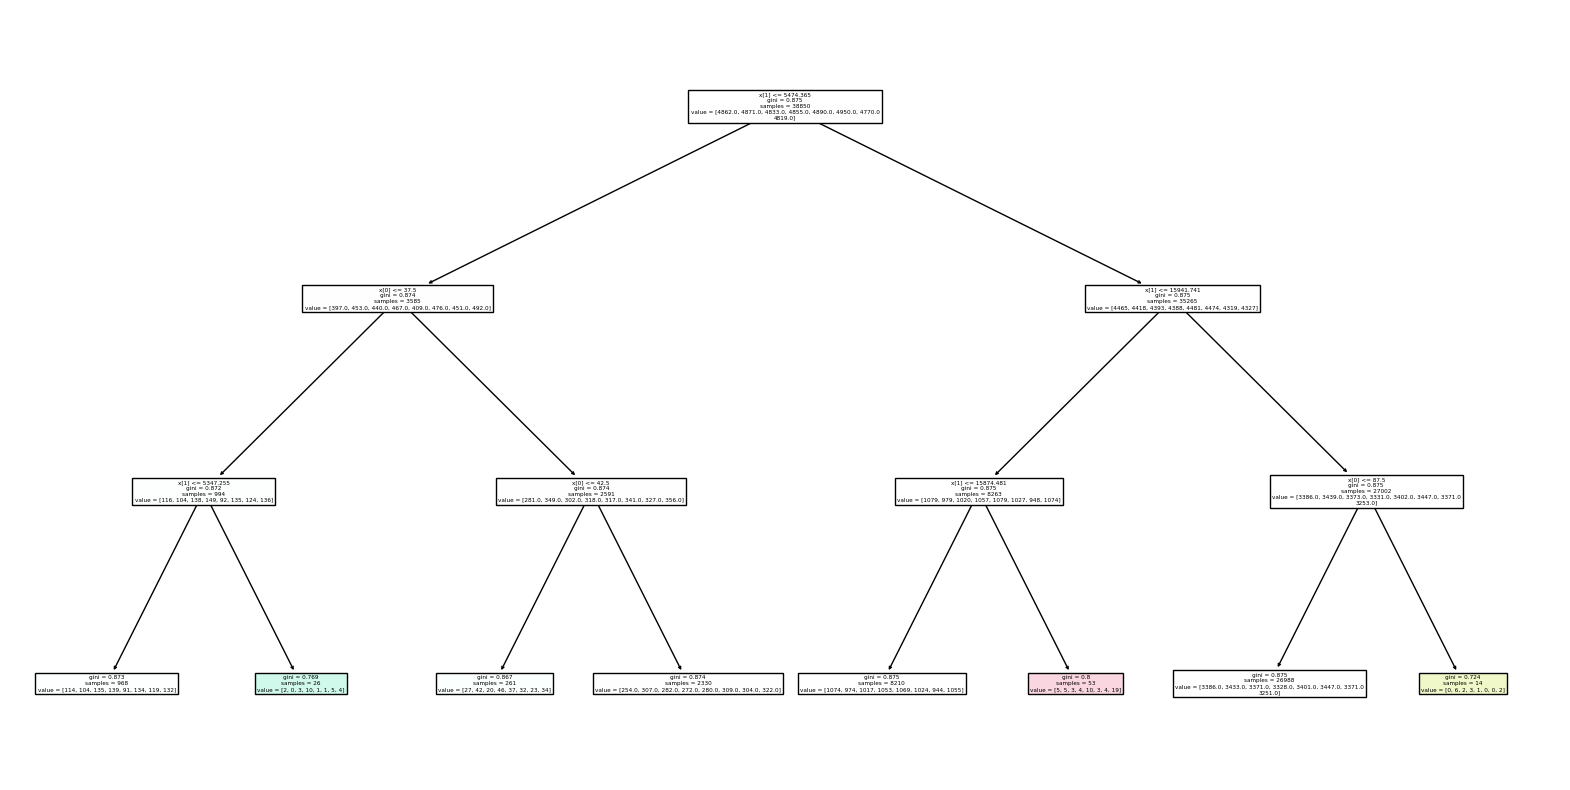

In [39]:
from sklearn import tree
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf,filled=True)
plt.show()


The decision tree diagram visually illustrates how the model segments the data at various decision points based on specific features, ultimately resulting in predictions or classifications. Each node displays a threshold for a particular feature (for example, X[1] <= 2474.362), and the tree branches out depending on whether the condition is met. The "value" at each node indicates the distribution of instances among different classes at that stage in the tree, aiding the decision-making process as the tree continues to split into more refined subsets.At the top of the tree, the model starts by dividing the data based on feature X[1], resulting in two main branches. These branches then further split according to additional features such as X[11] and X[10]. As the tree advances, it sharpens the classification or prediction, with each leaf node representing the final classification, marked by the class distribution.


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)


The decision tree's accuracy, which is roughly 0.1698, suggests that the model performs really poorly. This low accuracy raises the possibility that either the feature splits are insufficient to adequately generalize the patterns, or the tree may be overfitting to the training set. The model's performance could be enhanced by adding more methods like pruning or employing more robust features.
